In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
data=pd.read_csv("diabetes.csv") #Enter the path of the dataset here
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.shape

(768, 9)

In [6]:
X = data.drop('Outcome',axis=1).values
y = data['Outcome'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [9]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [10]:
X_train_norm

array([[0.41176471, 0.92929293, 0.68852459, ..., 0.5290611 , 0.12071269,
        0.33333333],
       [0.35294118, 0.42929293, 0.63934426, ..., 0.46497765, 0.13273942,
        0.35      ],
       [0.11764706, 0.53535354, 0.52459016, ..., 0.45454545, 0.58619154,
        0.21666667],
       ...,
       [0.05882353, 0.48989899, 0.57377049, ..., 0.56780924, 0.0596882 ,
        0.15      ],
       [0.35294118, 0.95959596, 0.75409836, ..., 0.5290611 , 0.08641425,
        0.75      ],
       [0.23529412, 0.72727273, 0.47540984, ..., 0.43964232, 0.09042316,
        0.26666667]])

In [11]:
a=pd.DataFrame(X_test_norm)
a

,0,1,2,3,4,5,6,7
0,0.176471,0.656566,0.639344,0.383333,0.106183,0.423249,0.106459,0.216667
1,0.235294,0.550505,0.524590,0.733333,0.133065,0.518629,0.365702,0.083333
2,0.647059,0.722222,0.770492,0.550000,0.196237,0.545455,0.075724,0.500000
3,0.235294,0.727273,0.672131,0.533333,0.000000,0.573770,0.209354,0.266667
4,0.470588,0.530303,0.819672,0.600000,0.000000,0.645306,0.069042,0.400000
...,...,...,...,...,...,...,...,...
226,0.117647,0.717172,0.672131,0.300000,0.086022,0.368107,0.301559,0.000000
227,0.294118,0.742424,0.614754,0.000000,0.000000,0.445604,0.155902,0.116667
228,0.764706,0.535354,0.590164,0.900000,0.000000,0.545455,0.041871,0.400000
229,0.117647,0.797980,0.737705,0.000000,0.000000,0.470939,0.321158,0.750000


In [12]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train_norm, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_norm, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_norm, y_test) 

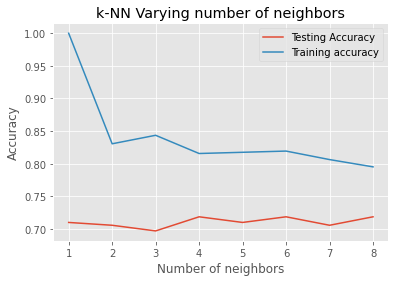

In [13]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=6)
#Fit the model
knn.fit(X_train_norm,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [15]:
knn.score(X_test_norm,y_test)

0.7186147186147186

In [16]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test_norm)
b=pd.DataFrame(confusion_matrix(y_test,y_pred))
b

,0,1
0,131,19
1,46,35


In [17]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,131,19,150
1,46,35,81
All,177,54,231


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       150
           1       0.65      0.43      0.52        81

   micro avg       0.72      0.72      0.72       231
   macro avg       0.69      0.65      0.66       231
weighted avg       0.71      0.72      0.70       231



In [19]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_norm,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
knn_cv.best_score_

0.750465549348231

In [21]:
knn_cv.best_params_

{'n_neighbors': 11}

In [22]:
x_new = np.array([[7, 117, 77, 27, 97, 30, 0.47, 47]])
prediction = knn_cv.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: [1]
